In [1]:
import xarray as xr

In [2]:
path = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled'

In [38]:
path_old = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled_old'

In [55]:
ds_old = xr.open_rasterio(path_old+'/1982/19820104-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled.tif').sel(
    y=slice(45, 20), x=slice(60, 106)
)
ds_old

<xarray.DataArray (band: 2, y: 500, x: 920)>
[920000 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1 2
  * y        (y) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02
  * x        (x) float64 60.02 60.08 60.12 60.17 ... 105.8 105.9 105.9 106.0
Attributes:
    transform:      (0.05, 0.0, 60.0, 0.0, -0.05, 45.0)
    crs:            +proj=longlat +ellps=WGS84 +no_defs=True
    res:            (0.05, 0.05)
    is_tiled:       0
    nodatavals:     (255.0, 255.0)
    scales:         (1.0, 1.0)
    offsets:        (0.0, 0.0)
    AREA_OR_POINT:  Area

In [130]:
s = 220
e = s+10
ds.y[s:e].values - ds_old.y[s:e].values

array([-7.10542736e-15,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [133]:
s = 220
e = s+10
ds.y[s:e] - ds_old.y[s:e]

<xarray.DataArray 'y' (y: 8)>
array([0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
  * y        (y) float64 33.92 33.88 33.83 33.77 33.67 33.62 33.58 33.52

Si pas exactement la même valeur me vire les latitudes... donc à remettre dans le même da

In [131]:
ds.y[s:e].values

array([33.975, 33.925, 33.875, 33.825, 33.775, 33.725, 33.675, 33.625,
       33.575, 33.525])

In [132]:
ds_old.y[s:e].values

array([33.975, 33.925, 33.875, 33.825, 33.775, 33.725, 33.675, 33.625,
       33.575, 33.525])

In [145]:
ds = xr.open_rasterio(path+'/1982/19820104-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0-HKH_refined_gapfilled.tif').sel(
    y=slice(45, 20), x=slice(60, 106)
)
ds

<xarray.DataArray (band: 1, y: 500, x: 920)>
[460000 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02
  * x        (x) float64 60.02 60.08 60.12 60.17 ... 105.8 105.9 105.9 106.0
Attributes:
    transform:      (0.05, 0.0, 60.0, 0.0, -0.05, 50.0)
    crs:            +init=epsg:4326
    res:            (0.05, 0.05)
    is_tiled:       0
    nodatavals:     (255.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

- 0-100 SCF [%]; 0 = snow free; 100 = fully snow covered
- 205 Cloud masked (including cloud shadow)
- 206 Satellite data available, but polar night
- 210 Water
- 215 Glaciers, icecaps, ice sheets
- 254 ERROR: No

In [156]:
# To correct the latitude precision problem
temp = ds.copy()
temp[0] = ds_old.sel(band=1).values

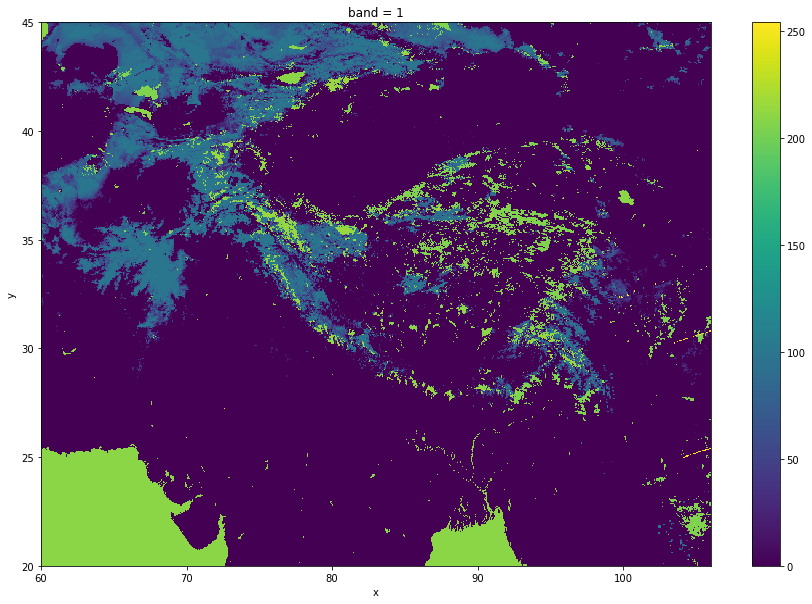

In [157]:
temp[0].plot(figsize=(15,10))

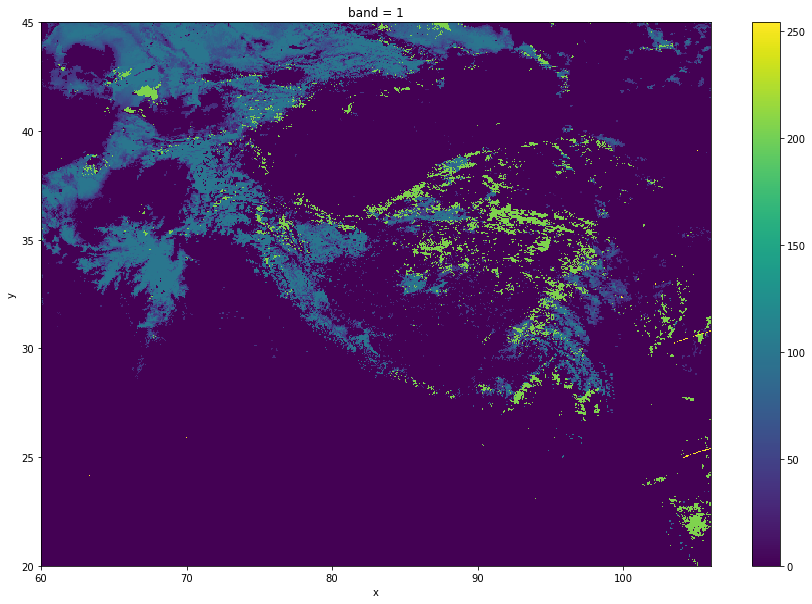

In [167]:
# There is no ice/water mask
ds.sel(band=1).plot(figsize=(15,10))

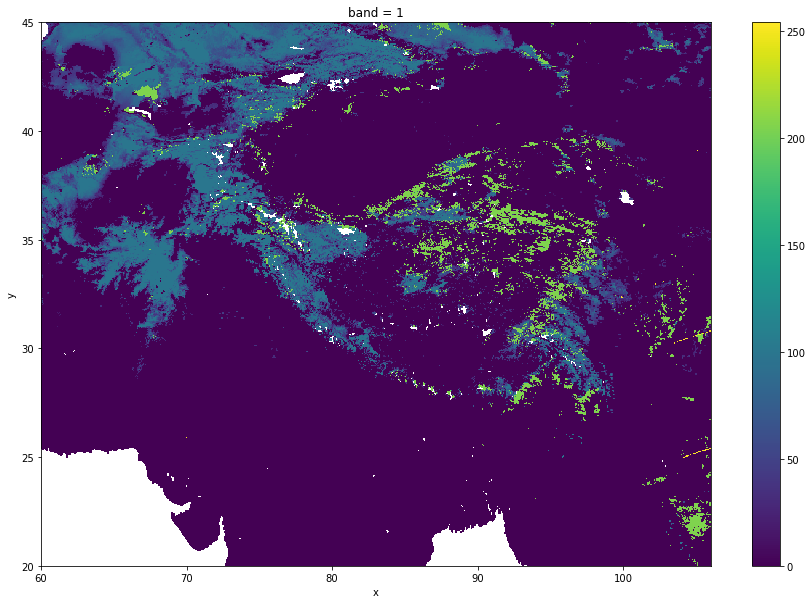

In [158]:
ds.sel(band=1).where((temp.sel(band=1) != 210) & (temp.sel(band=1) != 215)).plot(figsize=(15,10))

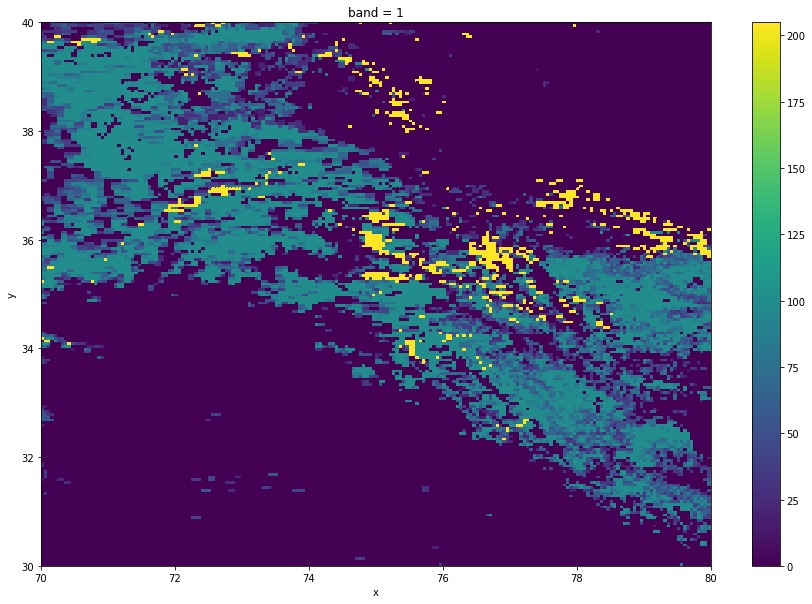

In [159]:
# There is no ice/water mask
ds.sel(band=1).sel(y=slice(40,30), x=slice(70,80)).plot(figsize=(15,10))

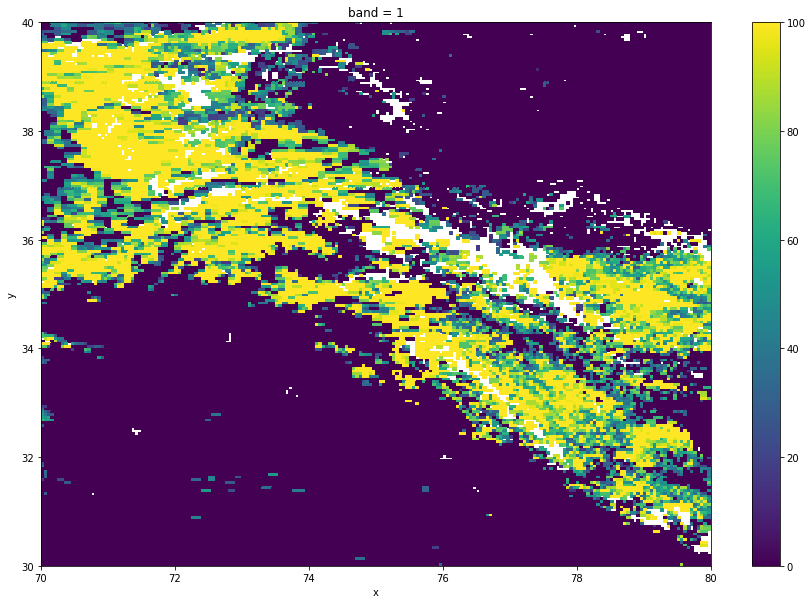

In [160]:
ds.sel(band=1).where((temp.sel(band=1) != 210) & (temp.sel(band=1) != 215) & (ds.sel(band=1) <= 100)).sel(y=slice(40,30), x=slice(70,80)).plot(figsize=(15,10))

In [161]:
da = ds.sel(band=1).where((temp.sel(band=1) != 210) & (temp.sel(band=1) != 215)).sel(y=slice(40,30), x=slice(70,80))
da_old = temp.sel(band=1).sel(y=slice(40,30), x=slice(70,80))

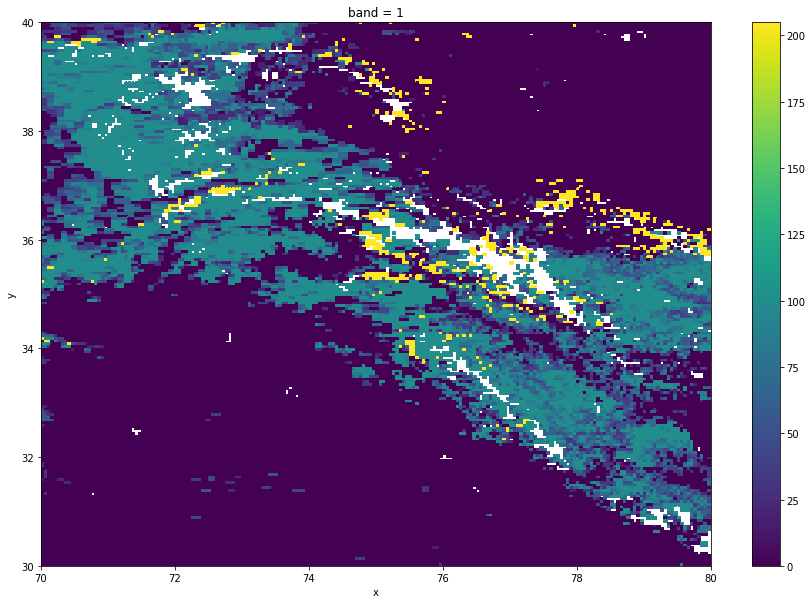

In [162]:
da.plot(figsize=(15,10))

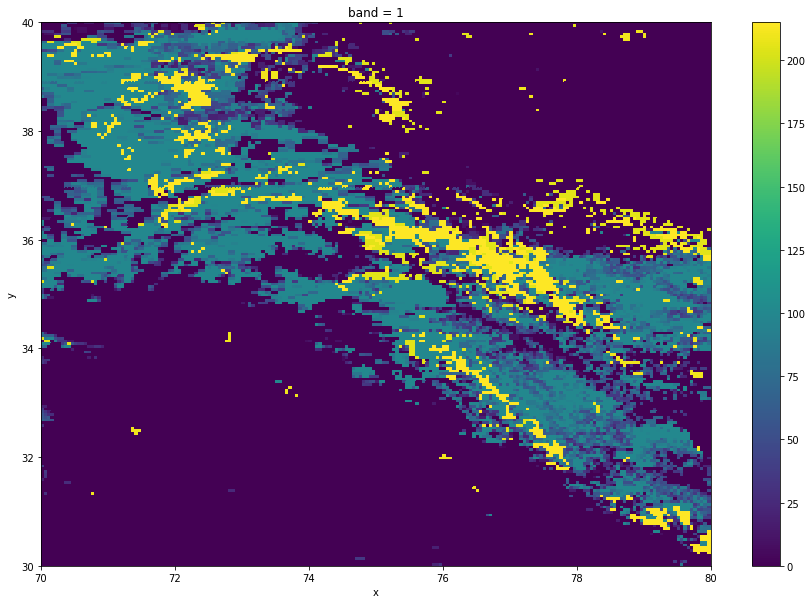

In [163]:
da_old.plot(figsize=(15,10))

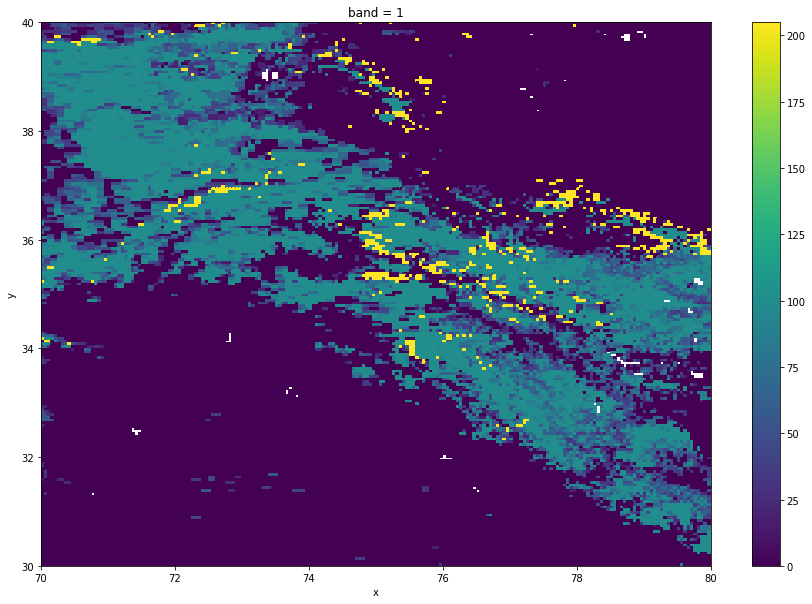

In [164]:
# Replace glaciers by 100% snow
da.where(da_old != 215, other=100).plot(figsize=(15,10))

In [169]:
da_ice_filled = da.where(da_old != 215, other=100)

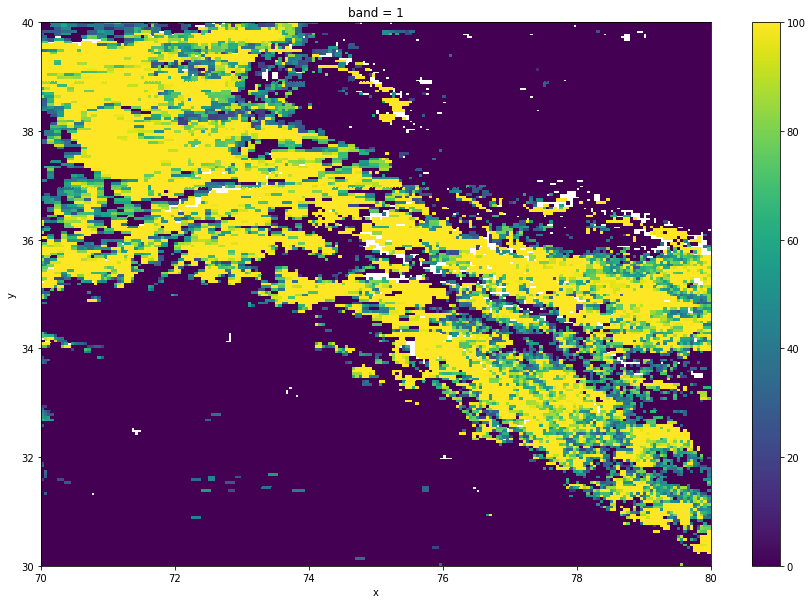

In [170]:
da_ice_filled.where(da_ice_filled <= 100).plot(figsize=(15,10))

## Get data with and without glaciers filled

In [171]:
da = ds.sel(band=1).where(
    (temp.sel(band=1) != 210) & (temp.sel(band=1) != 215) & (ds.sel(band=1) <= 100)
)
da = da.rename({'y': 'lat', 'x': 'lon'})
da = da.drop('band')

da_ice_filled = ds.sel(band=1).where(
    (temp.sel(band=1) != 210) & (temp.sel(band=1) != 215)
).where(temp.sel(band=1) != 215, other=100)
da_ice_filled = da_ice_filled.where(da_ice_filled <= 100)
da_ice_filled = da_ice_filled.rename({'y': 'lat', 'x': 'lon'})
da_ice_filled = da_ice_filled.drop('band')

da

<xarray.DataArray (lat: 500, lon: 920)>
array([[nan, nan, nan, ..., 44., 53., 56.],
       [nan, nan, nan, ...,  0.,  0., 68.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02
  * lon      (lon) float64 60.02 60.08 60.12 60.17 ... 105.8 105.9 105.9 106.0
Attributes:
    transform:      (0.05, 0.0, 60.0, 0.0, -0.05, 50.0)
    crs:            +init=epsg:4326
    res:            (0.05, 0.05)
    is_tiled:       0
    nodatavals:     (255.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

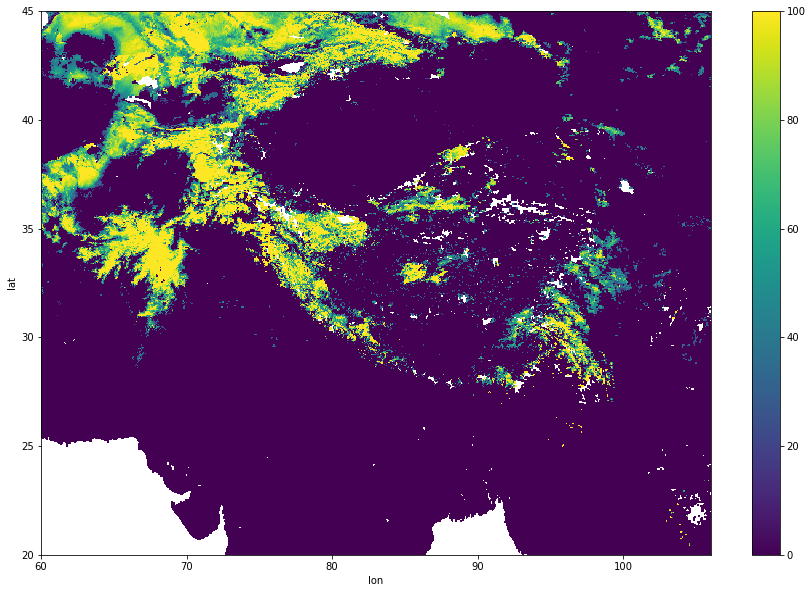

In [174]:
da.plot(figsize=(15,10))

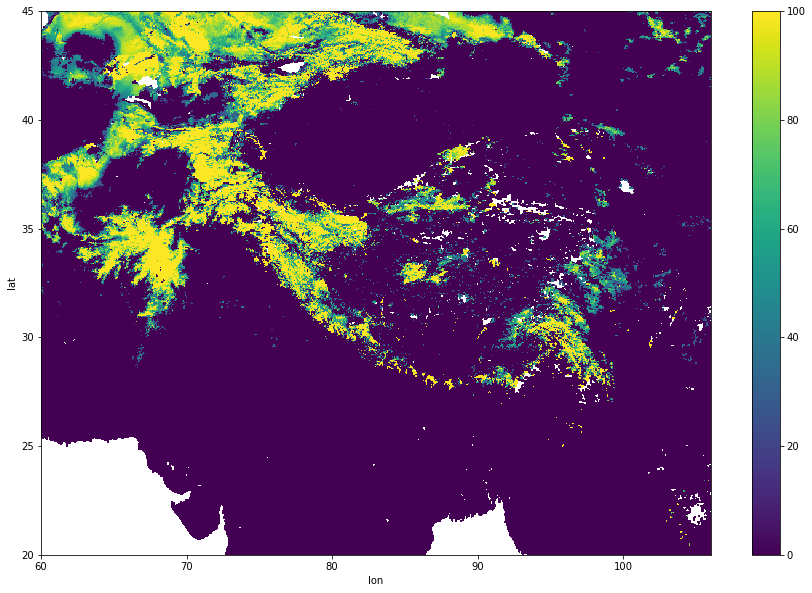

In [175]:
da_ice_filled.plot(figsize=(15,10))

# Save all data to nc

In [176]:
import pandas as pd
import os.path

In [178]:
path = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled'
path_old = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled_old'
path_out = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled_nc'

In [227]:
coords = xr.open_rasterio(path+'/1982/19820106-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0-HKH_refined_gapfilled.tif')

# for date in pd.date_range('1982-01-04', '2014-12-31'):
for date in pd.date_range('2005-09-01', '2014-12-31'):
# for date in pd.date_range('1982-01-04', '1982-01-07'):


    print(date)
    date_str = str(date)[:10].replace('-', '')
    year = date_str[:4]
    
    filename = path+'/'+year+'/'+date_str+'-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0-HKH_refined_gapfilled.tif'
    filename_old = path_old+'/'+year+'/'+date_str+'-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled.tif'
    
    if os.path.isfile(filename):
#         ds = xr.open_rasterio(filename).sel(y=slice(45, 20), x=slice(60, 106))
        ds = xr.open_rasterio(filename)
        
        # Because wrong coords from 2005-09-01
        ds_correct = coords.copy()
        ds_correct[0] = ds[0].values
        
        ds_old = xr.open_rasterio(filename_old).sel(y=slice(45, 20), x=slice(60, 106))
        
        # Because slight coords differences 10E-15
        temp = ds_correct.sel(y=slice(45, 20), x=slice(60, 106)).copy()
        temp[0] = ds_old.sel(band=1).values
        
        da = ds_correct.sel(y=slice(45, 20), x=slice(60, 106)).sel(band=1).where(
            (temp.sel(band=1) != 210) & (temp.sel(band=1) != 215) & (ds_correct.sel(y=slice(45, 20), x=slice(60, 106)).sel(band=1) <= 100)
        )
        da = da.rename({'y': 'lat', 'x': 'lon'})
        da = da.drop('band')
        da = da.assign_coords({'time': date}).expand_dims('time')

        da.to_netcdf(path_out+'/'+date_str+'-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled.nc')
    

2005-09-01 00:00:00
2005-09-02 00:00:00
2005-09-03 00:00:00
2005-09-04 00:00:00
2005-09-05 00:00:00
2005-09-06 00:00:00
2005-09-07 00:00:00
2005-09-08 00:00:00
2005-09-09 00:00:00
2005-09-10 00:00:00
2005-09-11 00:00:00
2005-09-12 00:00:00
2005-09-13 00:00:00
2005-09-14 00:00:00
2005-09-15 00:00:00
2005-09-16 00:00:00
2005-09-17 00:00:00
2005-09-18 00:00:00
2005-09-19 00:00:00
2005-09-20 00:00:00
2005-09-21 00:00:00
2005-09-22 00:00:00
2005-09-23 00:00:00
2005-09-24 00:00:00
2005-09-25 00:00:00
2005-09-26 00:00:00
2005-09-27 00:00:00
2005-09-28 00:00:00
2005-09-29 00:00:00
2005-09-30 00:00:00
2005-10-01 00:00:00
2005-10-02 00:00:00
2005-10-03 00:00:00
2005-10-04 00:00:00
2005-10-05 00:00:00
2005-10-06 00:00:00
2005-10-07 00:00:00
2005-10-08 00:00:00
2005-10-09 00:00:00
2005-10-10 00:00:00
2005-10-11 00:00:00
2005-10-12 00:00:00
2005-10-13 00:00:00
2005-10-14 00:00:00
2005-10-15 00:00:00
2005-10-16 00:00:00
2005-10-17 00:00:00
2005-10-18 00:00:00
2005-10-19 00:00:00
2005-10-20 00:00:00


In [229]:
coords = xr.open_rasterio(path+'/1982/19820106-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0-HKH_refined_gapfilled.tif')

for date in pd.date_range('1982-01-04', '2014-12-31'):
# for date in pd.date_range('1982-01-04', '1982-01-06'):
    print(date)
    date_str = str(date)[:10].replace('-', '')
    year = date_str[:4]
    
    filename = path+'/'+year+'/'+date_str+'-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0-HKH_refined_gapfilled.tif'
    filename_old = path_old+'/'+year+'/'+date_str+'-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled.tif'
    
    if os.path.isfile(filename):
        #         ds = xr.open_rasterio(filename).sel(y=slice(45, 20), x=slice(60, 106))
        ds = xr.open_rasterio(filename)
        
        # Because wrong coords from 2005-09-01
        ds_correct = coords.copy()
        ds_correct[0] = ds[0].values
        
        ds_old = xr.open_rasterio(filename_old).sel(y=slice(45, 20), x=slice(60, 106))
        
        # Because slight coords differences 10E-15
        temp = ds_correct.sel(y=slice(45, 20), x=slice(60, 106)).copy()
        temp[0] = ds_old.sel(band=1).values
        
        da_ice_filled = ds_correct.sel(y=slice(45, 20), x=slice(60, 106)).sel(band=1).where(
            (temp.sel(band=1) != 210) & (temp.sel(band=1) != 215)
        ).where(temp.sel(band=1) != 215, other=100)
        da_ice_filled = da_ice_filled.where(da_ice_filled <= 100)
        da_ice_filled = da_ice_filled.rename({'y': 'lat', 'x': 'lon'})
        da_ice_filled = da_ice_filled.drop('band')
        da_ice_filled = da_ice_filled.assign_coords({'time': date}).expand_dims('time')

        da_ice_filled.to_netcdf(path_out+'/'+date_str+'-ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled_icefilled.nc')
    

1982-01-04 00:00:00
1982-01-05 00:00:00
1982-01-06 00:00:00
1982-01-07 00:00:00
1982-01-08 00:00:00
1982-01-09 00:00:00
1982-01-10 00:00:00
1982-01-11 00:00:00
1982-01-12 00:00:00
1982-01-13 00:00:00
1982-01-14 00:00:00
1982-01-15 00:00:00
1982-01-16 00:00:00
1982-01-17 00:00:00
1982-01-18 00:00:00
1982-01-19 00:00:00
1982-01-20 00:00:00
1982-01-21 00:00:00
1982-01-22 00:00:00
1982-01-23 00:00:00
1982-01-24 00:00:00
1982-01-25 00:00:00
1982-01-26 00:00:00
1982-01-27 00:00:00
1982-01-28 00:00:00
1982-01-29 00:00:00
1982-01-30 00:00:00
1982-01-31 00:00:00
1982-02-01 00:00:00
1982-02-02 00:00:00
1982-02-03 00:00:00
1982-02-04 00:00:00
1982-02-05 00:00:00
1982-02-06 00:00:00
1982-02-07 00:00:00
1982-02-08 00:00:00
1982-02-09 00:00:00
1982-02-10 00:00:00
1982-02-11 00:00:00
1982-02-12 00:00:00
1982-02-13 00:00:00
1982-02-14 00:00:00
1982-02-15 00:00:00
1982-02-16 00:00:00
1982-02-17 00:00:00
1982-02-18 00:00:00
1982-02-19 00:00:00
1982-02-20 00:00:00
1982-02-21 00:00:00
1982-02-22 00:00:00


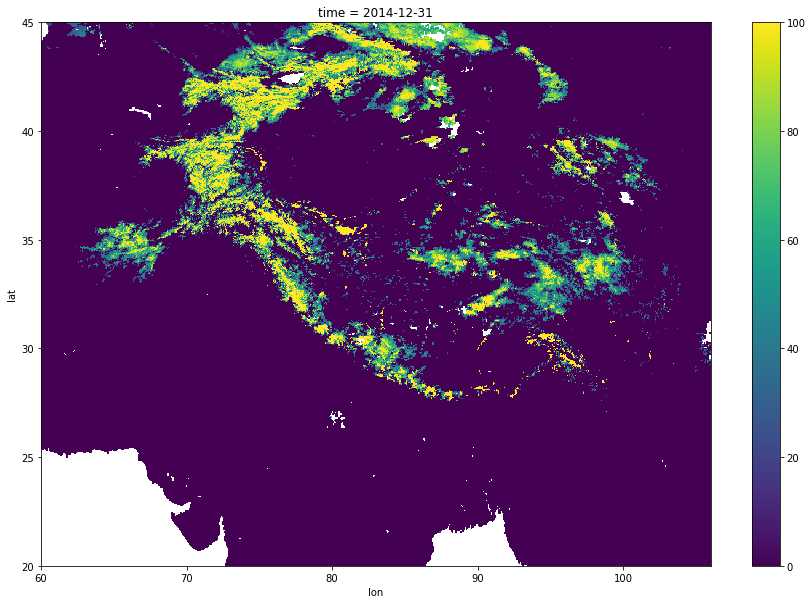

In [232]:
da_ice_filled[0].plot(figsize=(15,10))

# Make monthly mean

In [233]:
path_nc = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled_nc'
path_mon = 'ESA_CCI_snow_SCFG_v1.0_HKH_gapfilled_monthly'

In [234]:
ds = xr.open_mfdataset(path_nc+'/*gapfilled.nc')
ds

<xarray.Dataset>
Dimensions:                        (lat: 500, lon: 920, time: 11944)
Coordinates:
  * lon                            (lon) float64 60.02 60.08 ... 105.9 106.0
  * lat                            (lat) float64 44.98 44.92 ... 20.07 20.02
  * time                           (time) datetime64[ns] 1982-01-04 ... 2014-...
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float32 dask.array<chunksize=(1, 500, 920), meta=np.ndarray>

In [235]:
ds_icefilled = xr.open_mfdataset(path_nc+'/*gapfilled_icefilled.nc')
ds_icefilled

<xarray.Dataset>
Dimensions:                        (lat: 500, lon: 920, time: 11944)
Coordinates:
  * lon                            (lon) float64 60.02 60.08 ... 105.9 106.0
  * lat                            (lat) float64 44.98 44.92 ... 20.07 20.02
  * time                           (time) datetime64[ns] 1982-01-04 ... 2014-...
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float32 dask.array<chunksize=(1, 500, 920), meta=np.ndarray>

In [236]:
da = ds.__xarray_dataarray_variable__.resample(time='M').mean('time')
da

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


<xarray.DataArray '__xarray_dataarray_variable__' (time: 396, lat: 500, lon: 920)>
dask.array<where, shape=(396, 500, 920), dtype=float32, chunksize=(4, 500, 920), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2014-12-31
  * lon      (lon) float64 60.02 60.08 60.12 60.17 ... 105.8 105.9 105.9 106.0
  * lat      (lat) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02

In [237]:
da_icefilled = ds_icefilled.__xarray_dataarray_variable__.resample(time='M').mean('time')
da_icefilled

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


<xarray.DataArray '__xarray_dataarray_variable__' (time: 396, lat: 500, lon: 920)>
dask.array<where, shape=(396, 500, 920), dtype=float32, chunksize=(4, 500, 920), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2014-12-31
  * lon      (lon) float64 60.02 60.08 60.12 60.17 ... 105.8 105.9 105.9 106.0
  * lat      (lat) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02

In [238]:
da.name = 'snc'
da_icefilled.name = 'snc'

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


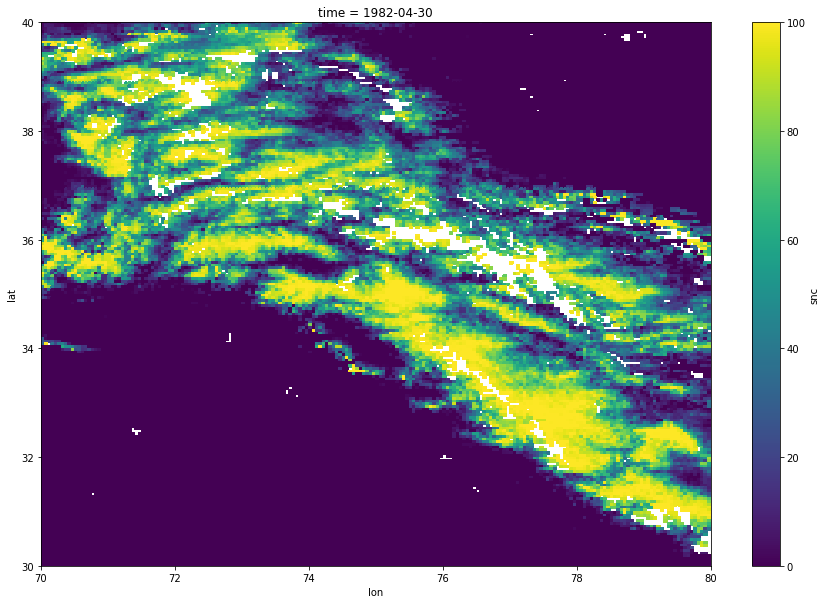

In [239]:
da[3].sel(lat=slice(40,30), lon=slice(70,80)).plot(figsize=(15,10))

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


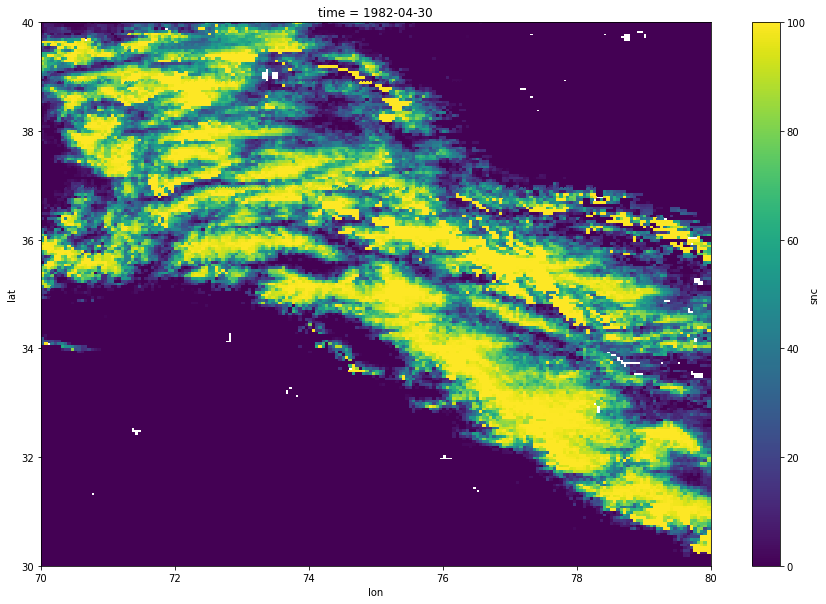

In [240]:
da_icefilled[3].sel(lat=slice(40,30), lon=slice(70,80)).plot(figsize=(15,10))

In [241]:
da.to_netcdf(path_mon+'/ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled_montlhy_1982-2014.nc')

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [242]:
da_icefilled.to_netcdf(path_mon+'/ESACCI-L3C_SNOW-SCFG-AVHRR_MERGED-fv1.0_HKH_gapfilled_icefilled_montlhy_1982-2014.nc')

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [243]:
ds = xr.open_dataset('GMTED2010_15n015_00625deg.nc').drop_dims('nbounds').swap_dims(
    {'nlat': 'latitude', 'nlon': 'longitude'}).drop({'nlat', 'nlon'}).rename(
    {'latitude': 'lat', 'longitude': 'lon'}).sel(lat=slice(20,45), lon=slice(60,110))
elevation = ds.elevation

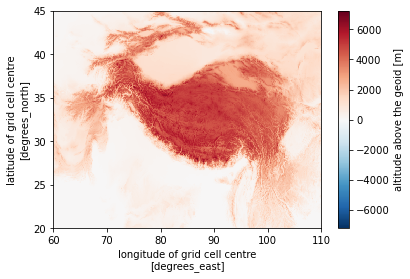

In [244]:
elevation.plot()

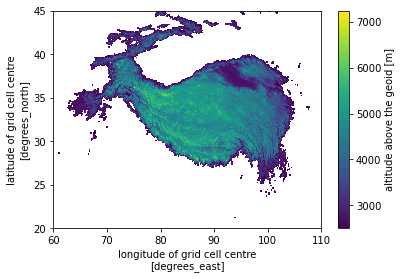

In [245]:
elevation.where(elevation > 2500).plot()

In [246]:
import xesmf as xe

In [247]:
regridder = xe.Regridder(elevation, da, 'bilinear', periodic=False, reuse_weights=True)
elevation_regrid = regridder(elevation)

Create weight file: bilinear_400x800_500x920.nc


/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


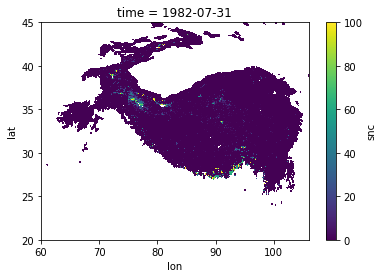

In [248]:
da.where(elevation_regrid > 2500)[6].plot()

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


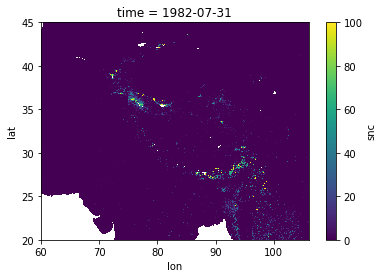

In [249]:
da[6].plot()

In [250]:
import sys
sys.path.insert(1, '/home/lalandmi/Dropbox/Thèse/notebooks/utils') # to include my util file in previous directory
import utils as u

In [251]:
da.load()
da_icefilled.load()

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'snc' (time: 396, lat: 500, lon: 920)>
array([[[       nan,        nan,        nan, ..., 28.833334 ,
         36.416668 , 50.25     ],
        [       nan,        nan,        nan, ..., 23.833334 ,
         25.173914 , 34.291668 ],
        [       nan,        nan,        nan, ..., 24.291666 ,
         21.208334 , 27.75     ],
        ...,
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ],
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ],
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ]],

       [[       nan,        nan,        nan, ...,  0.       ,
          1.92     , 12.923077 ],
        [       nan,        nan,        nan, ...,  0.       ,
          3.9230769,  6.88     ],
        [       nan,        nan,        nan, ...,  1.7307693,
          8.423077 ,  6.8846154],
...
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ],
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ],
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ]],

       [[       nan,        nan,        nan, ...,  1.0967742,
          1.0967742,  1.1935484],
        [       nan,        nan,        nan, ...,  0.       ,
          4.967742 ,  5.       ],
        [       nan,        nan,        nan, ...,  8.032258 ,
          5.806452 ,  8.193548 ],
        ...,
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ],
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ],
        [       nan,        nan,        nan, ...,  0.       ,
          0.       ,  0.       ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-31 1982-02-28 ... 2014-12-31
  * lon      (lon) float64 60.02 60.08 60.12 60.17 ... 105.8 105.9 105.9 106.0
  * lat      (lat) float64 44.98 44.92 44.88 44.83 ... 20.17 20.12 20.07 20.02

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


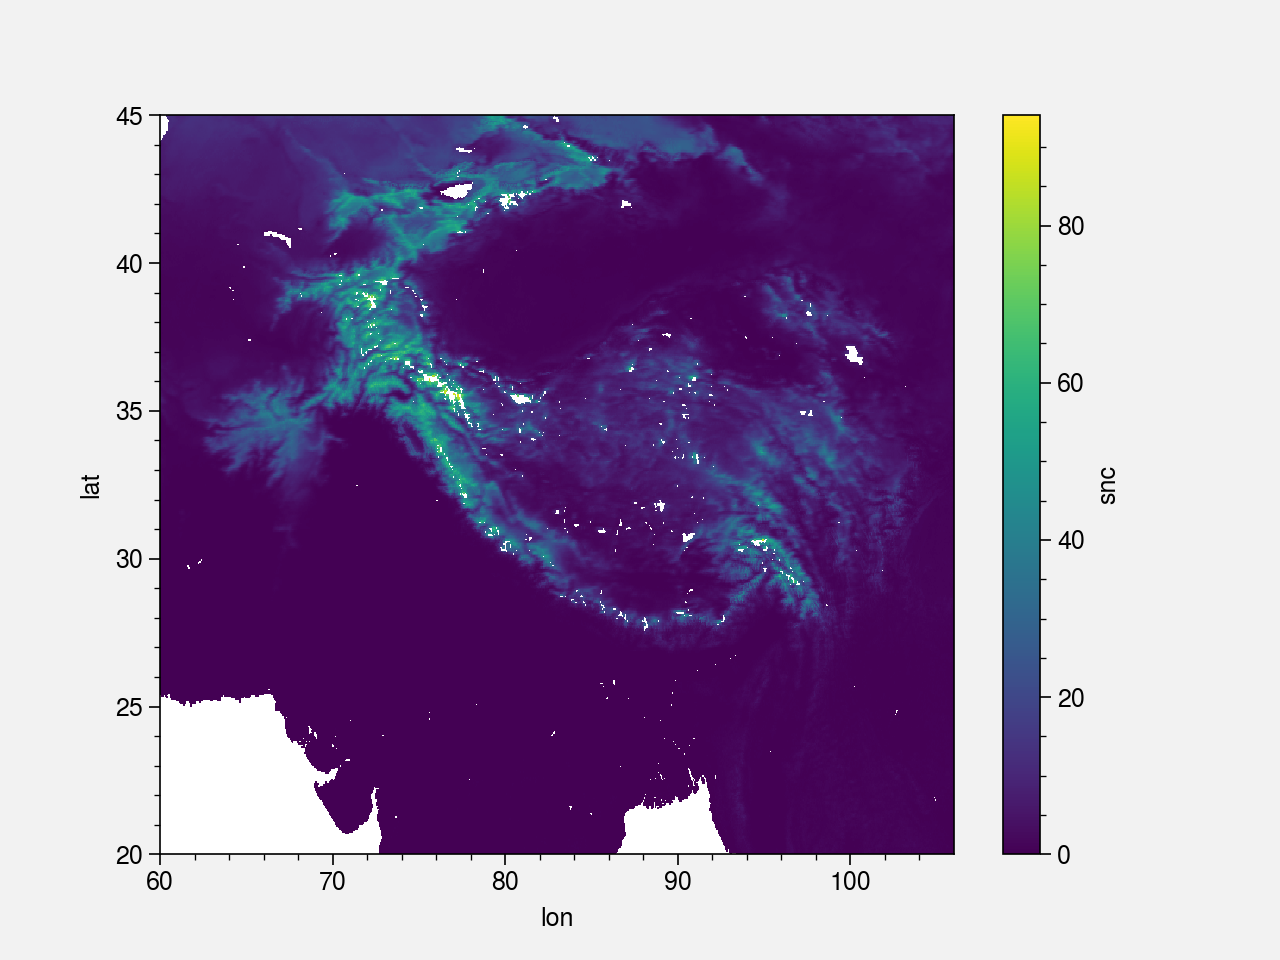

In [252]:
da.mean('time').plot()

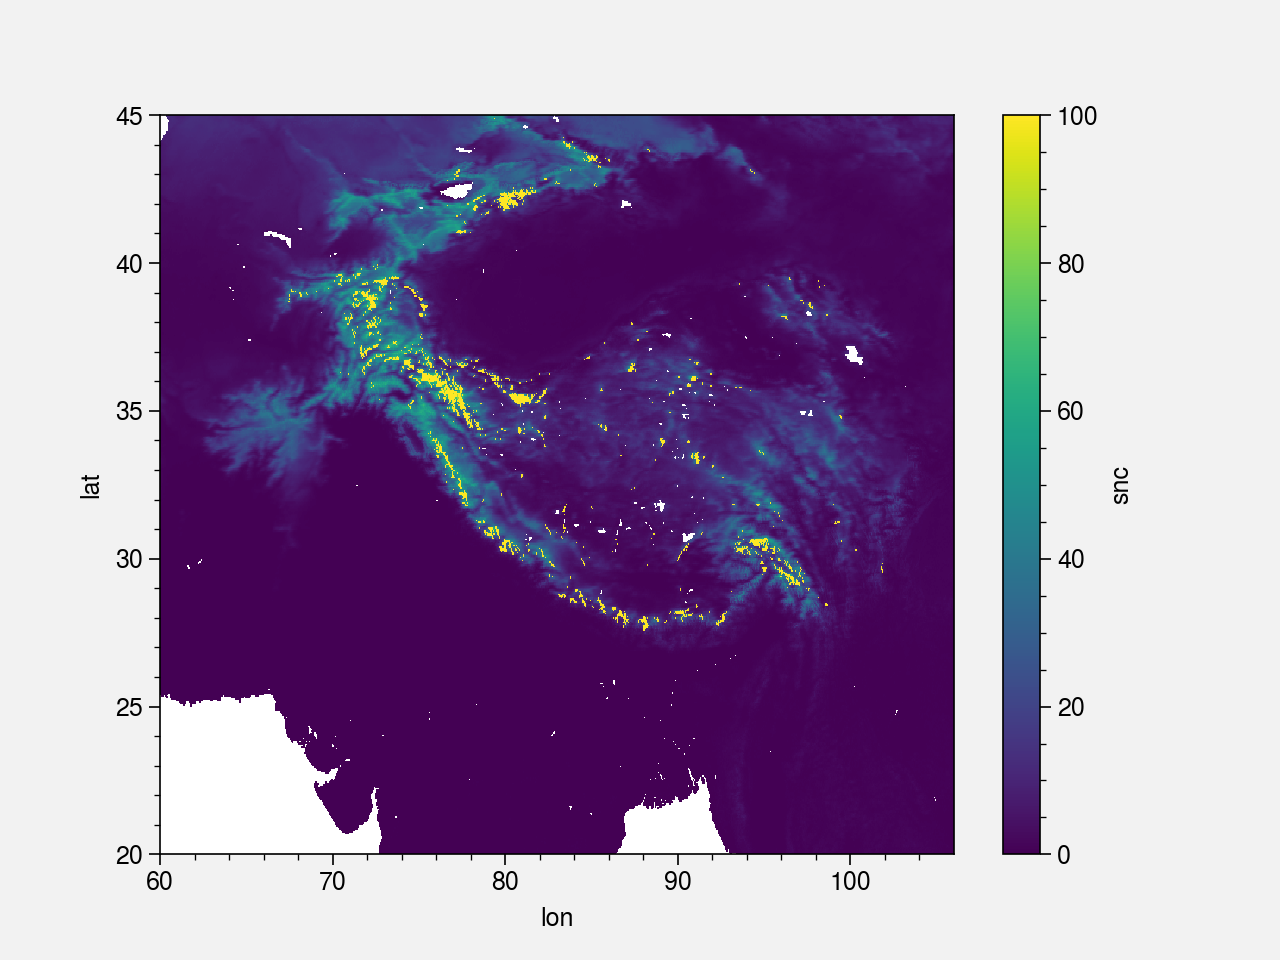

In [253]:
da_icefilled.mean('time').plot()

In [254]:
ac = u.spatial_average(u.annual_cycle(da.where(elevation_regrid > 2500), skipna=True))

In [255]:
ac_icefilled = u.spatial_average(u.annual_cycle(da_icefilled.where(elevation_regrid > 2500), skipna=True))

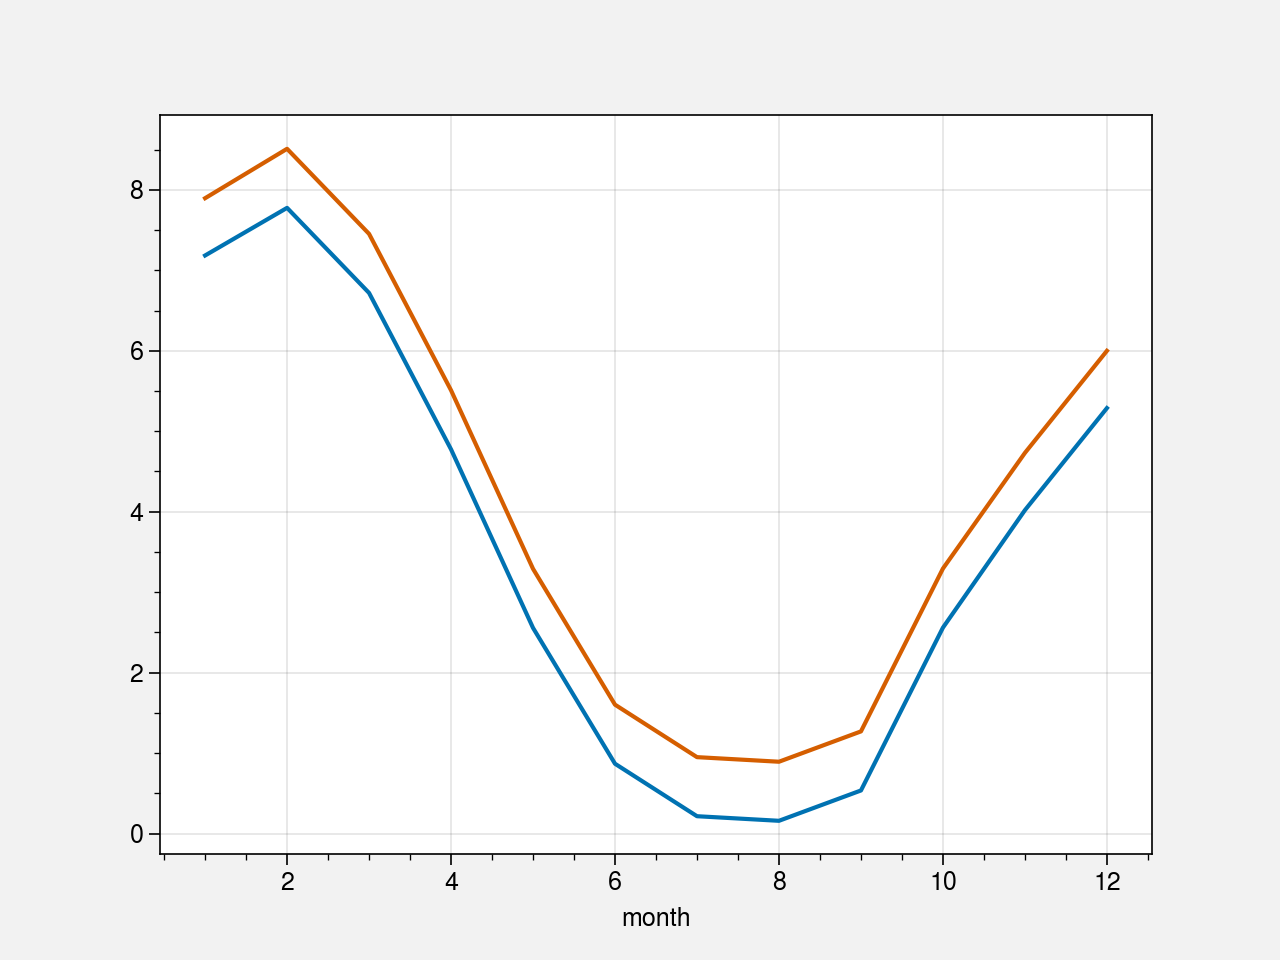

In [256]:
ac.plot()
ac_icefilled.plot()